# YZV 211E 
# Homework 2
### Prepared by Res. Asst. Yaren Yılmaz
yilmazy20@itu.edu.tr

In this assignment, you'll dive into the Olympic medalists dataset, using different visualization techniques to uncover patterns and connections. Each question invites you to choose the right visualization method, pushing you to think critically about representing complex data effectively. The aim is to deepen your understanding of data visualization principles and inspire creative, insightful interpretations of the dataset. 

* If you need you can implement data cleaning/preparation steps before data visualization.

* Do not use the same visualization method for each question, try to choose different techniques among the most appropriate ones.
,
* If any data processing steps are required before visualization, solve these problems as efficiently as possible with pandas. Avoid using unnecessary loops.
  
* Don't forget to leave comments in the notebook. Print the necessary outputs at each stage in your code. Assignments without necessary outputs and comments will be deducted points.
  
* Since this is a visualization assignment, in addition to giving the correct answer, you will also be evaluated on visual details (titles, naming, legend, etc.)

**Important:**
* **Run the notebooks before the submission.**

In [1]:
# You can use the following libraries if you need them.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset:** Download the dataset from [here](https://github.com/kalilurrahman/dataset/blob/main/Summer-Olympic-medals-1976-to-2008.csv). This dataset is a list of all the medal winners in the Summer Olympics from 1976 Montreal to 2008 Beijing. It includes each and every medal awarded within the period.

In [2]:
#data = pd.read_csv("C:/Users/PC/Desktop/Summer-Olympic-medals-1976-to-2008.csv", encoding='latin-1')
#pd.DataFrame(data)
url = 'https://raw.githubusercontent.com/kalilurrahman/dataset/main/Summer-Olympic-medals-1976-to-2008.csv'
data = pd.read_csv(url, encoding='latin-1')
df = pd.DataFrame(data)
df['Year'] = df['Year'].astype('Int64')
df.dropna(inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15316 non-null  object
 1   Year          15316 non-null  Int64 
 2   Sport         15316 non-null  object
 3   Discipline    15316 non-null  object
 4   Event         15316 non-null  object
 5   Athlete       15316 non-null  object
 6   Gender        15316 non-null  object
 7   Country_Code  15316 non-null  object
 8   Country       15316 non-null  object
 9   Event_gender  15316 non-null  object
 10  Medal         15316 non-null  object
dtypes: Int64(1), object(10)
memory usage: 1.4+ MB


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


### Q1 Temporal Analysis of Medal Wins (20 points):
* Explore the temporal patterns of medal wins for top 10 country wity the highest number of medals. Choose an appropriate visualization method to illustrate how the selected countries' medal counts have changed over time.
* Use pandas functions for data preparation and try to avoid the usage of unnecessary loops.
* Discuss any patterns you observe.

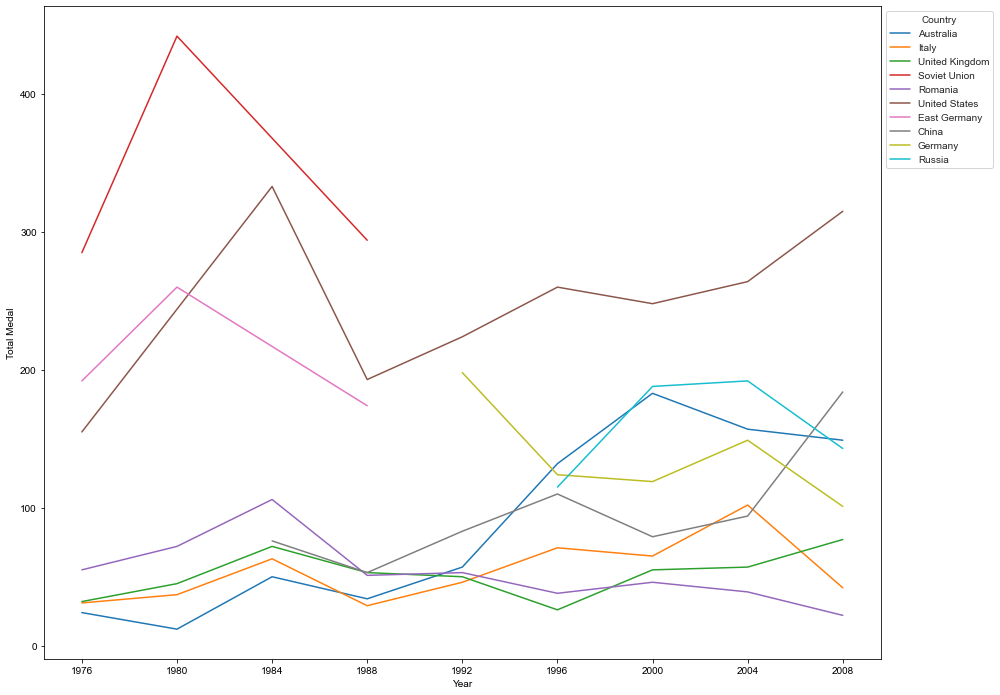

In [3]:
selected_countries = list(df.Country.value_counts().keys())[0:10]
a = df[df.Country.isin(selected_countries)]
a = a[["Year", "Country"]]

year = []
country = []
for i,k in a.value_counts().keys():
    year.append(i)
    country.append(k)

frame123 = pd.DataFrame(list(zip(year,country,a.value_counts().values)))
frame123.columns = ['Year', 'Country', 'Total Medal']
frame123.sort_values('Year', inplace=True)
fig, ax = plt.subplots(figsize=(15,12))
sns.set_style("ticks")
g = sns.lineplot(ax=ax, data=frame123, x='Year', y='Total Medal', hue='Country',)
g.set_xticks(sorted(set(frame123['Year'])))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))


**Your Answer:** excluding top 3 contries, others have similar changes and closer medal counts to each other

### Q2 Top 10 Gold Winner Countries (20 points)
* Visualize the 10 countries with the highest number of gold medals. You can choose any appropriate chart type. The chart should show the number of gold medals.
* Interpret the result.

<Axes: xlabel='Gold Medal Count', ylabel='Country'>

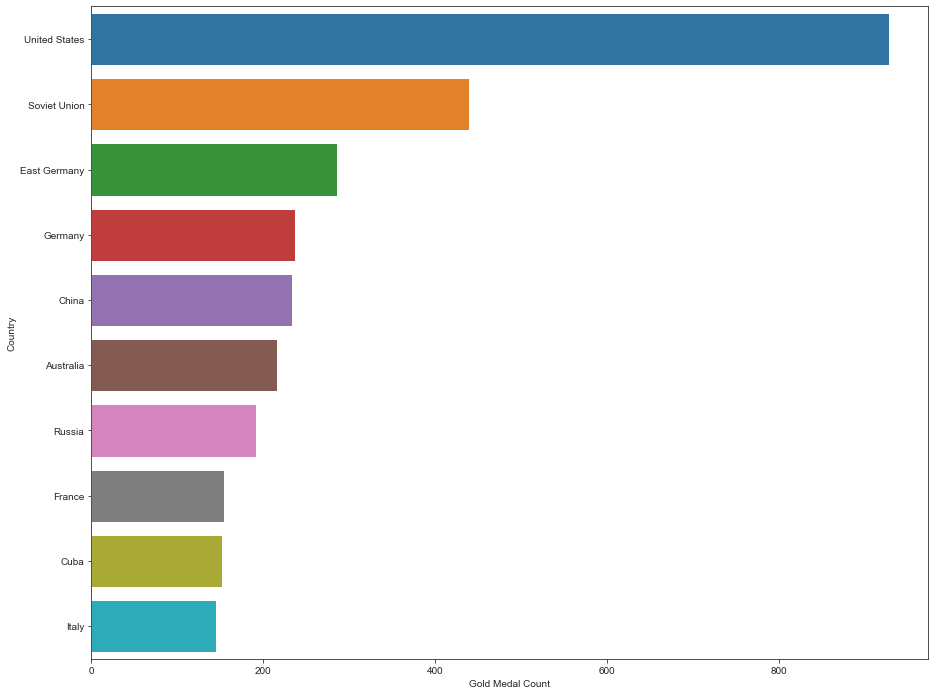

In [4]:
df_gold = df[df['Medal'] == 'Gold'][['Country','Medal']].value_counts()[0:10]

top_gold_medal_countries = []
for i,k in df_gold.keys():
    top_gold_medal_countries.append(i)

df_gold = pd.DataFrame(list(zip(top_gold_medal_countries, df_gold.values)), columns= ['Country','Gold Medal Count'])
fig, ax = plt.subplots(figsize=(15,12))
sns.barplot(ax=ax, data=df_gold, x='Gold Medal Count', y='Country', hue='Country')

**Your Answer:**

### Q3 Discipline Diversity in Successful Countries (20 points):
* Create a visualization that represents the diversity of disciplines in which the 10 countries with the most medals. Sort the countries by the total number of medals in descending order.
* Discuss any correlation between a country's success and its range of disciplines.

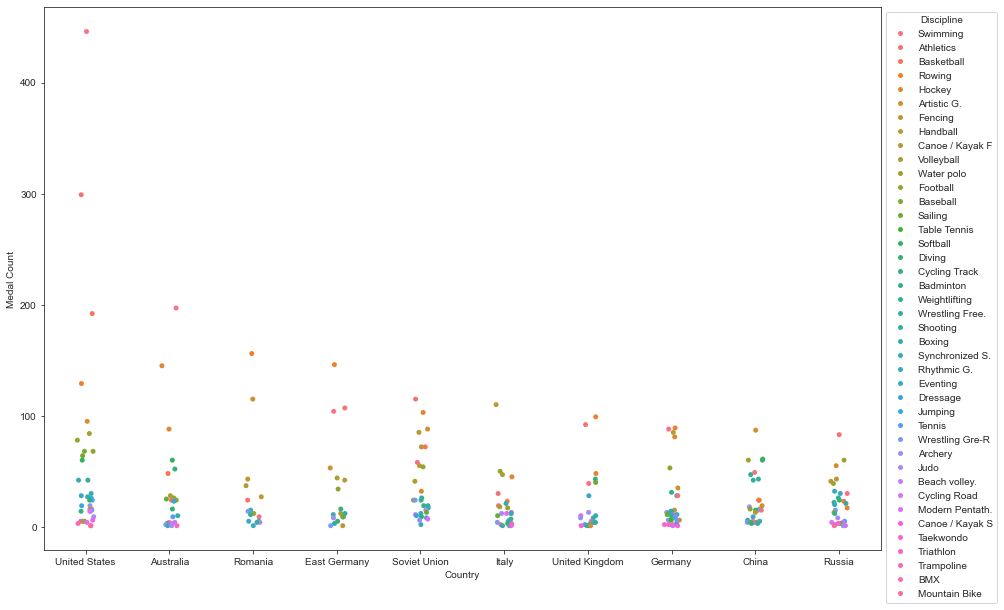

In [5]:
countries = df['Country'].value_counts()[0:10].keys()

a = df[df.Country.isin(countries)][['Country','Discipline']].value_counts()
ggg = []
hhh = []
for i,k in a.keys():
    ggg.append(i)
    hhh.append(k)
a = pd.DataFrame(list(zip(ggg,hhh,a.values)), columns= ['Country','Discipline','Medal Count'])
fig, ax = plt.subplots(figsize=(15, 10))
solution = sns.stripplot(ax = ax, data=a, x='Country', y='Medal Count', hue='Discipline')
sns.move_legend(solution, "upper left", bbox_to_anchor=(1, 1))


**Write here:**

### Q4 Female Gender Distribution Across Sports (20 points):
* Investigate the gender distribution (in percentage) in each sport. Choose the most suitable visualization method.
* Discuss any notable result.

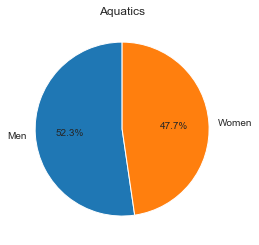

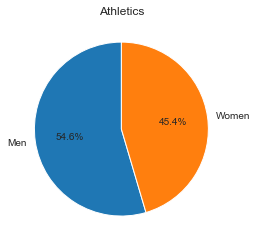

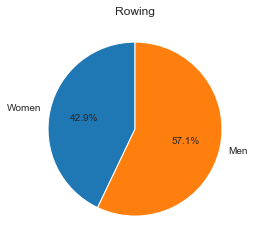

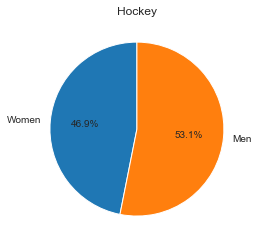

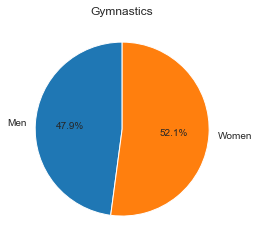

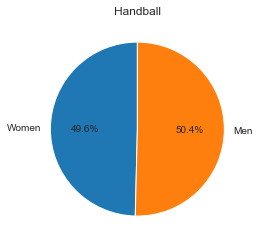

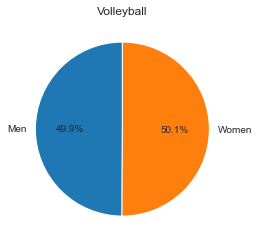

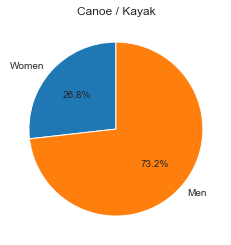

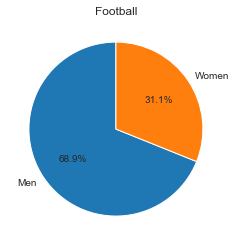

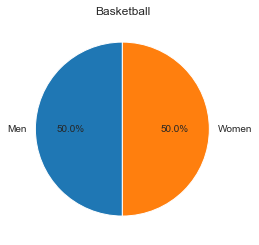

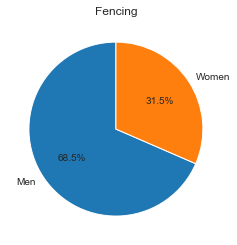

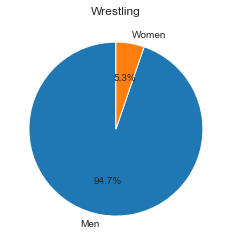

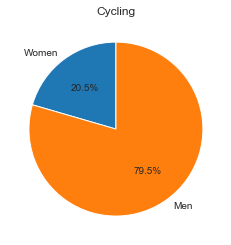

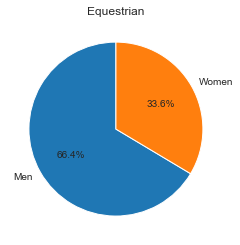

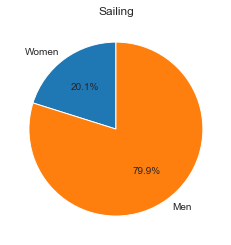

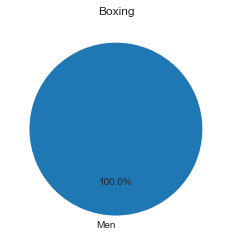

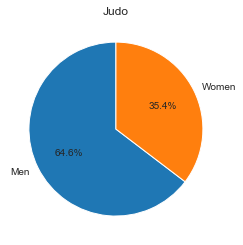

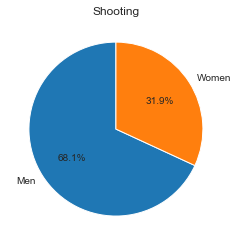

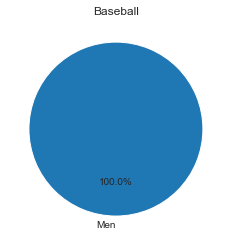

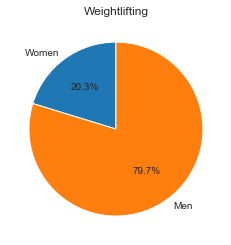

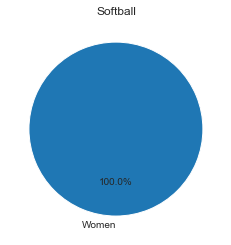

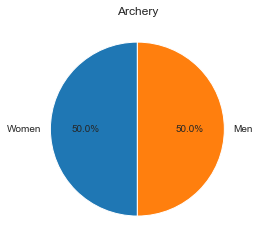

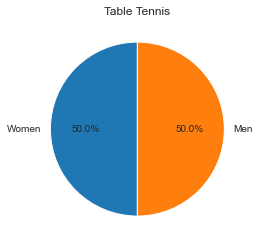

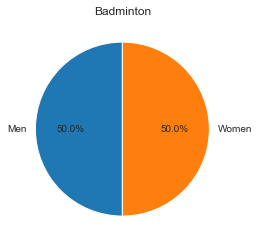

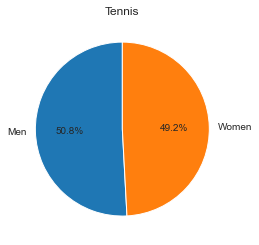

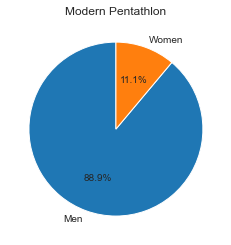

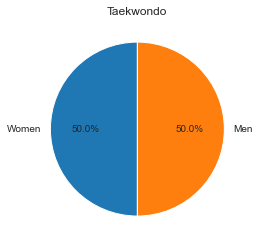

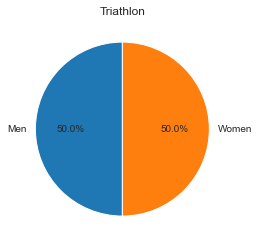

In [6]:
l1 = []
l2 = []
abc = df.copy()
abc = df[['Sport','Gender']].value_counts()
for i,k in abc.keys():
    l1.append(i)
    l2.append(k)
b = pd.DataFrame(list(zip(l1,l2,abc.values)), columns=['Sport','Gender','Count'])
b.sort_values('Sport', inplace=True)
for i in df['Sport'].value_counts().keys():
    temp = b[b['Sport'] == '{}'.format(i)]
    plt.pie(temp['Count'], labels=temp['Gender'], startangle=90, autopct='%1.1f%%')
    plt.title(i)
    plt.show()

**Your Answer:** There are some sports that only one gender compete.

### Q5 Geographical Visualization (20 points)
* You should plot a map and color the countries according to the number of medals the country have. The coloring should be correlated with the number of medals. (For example: if a country has more medals than the other countries, then it should be darker than the other ones.)
* In this part, you should use [geopandas](https://geopandas.org/en/stable/index.html). If you need, you can use the below code to download the library.
* Write your comments about the visualization.

In [7]:
# !pip install geopandas
import geopandas as gpd

In [8]:
# Total matched country count using country name is different from when using country code so i sum them and eliminate the duplicates.
# This way i got more countries matched with the geo set
gp = pd.DataFrame(list(zip(df['Country_Code'].value_counts().keys(),df['Country_Code'].value_counts().values)),columns=['iso_a3', 'Medal_Count'])
gp2 = pd.DataFrame(list(zip(df['Country'].value_counts().keys(),df['Country'].value_counts().values)),columns=['name', 'Medal_Count'])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world2 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(gp, on='iso_a3')
world2 = world2.merge(gp2, on='name')
a3 = pd.concat([world, world2])
a3.drop_duplicates(inplace=True)
a3.drop(index=74, inplace=True)
a3.explore(column='Medal_Count', cmap='viridis', legend=True, vmin=0, vmax=1992)

C:\Users\PC\AppData\Local\Temp\ipykernel_628\2532806894.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\PC\AppData\Local\Temp\ipykernel_628\2532806894.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world2 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


**Answer here:**